The purpose of this code is to see how many samples have been taken at each edge

# 1) Setup

In [1]:
#modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [2]:
#retrieve data from MongoDB
#define my database and collection
cluster = MongoClient("mongodb://127.0.0.1:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false")
db = cluster["Rokos2021"]
collection = db["walmart_targeted"]
print("done")

done


In [6]:
#Filter
#filter & store as pandas dataframe
results = collection.find({"_meta.inserted_at": {"$gte": datetime(2021,2,20,9,0,0),
                                "$lte":datetime(2021,2,28,9,0,0)}, 
                                "origin": {"$ne": None}, 
                                "edge_id": {"$ne": None}, 
                                "target":{"$ne":None},
                                "succeeded":True})

#convert to dataframe format
df = pd.DataFrame(list(results))

#remove data where policy_goal = target
df = df[ df["policy_goal"] != df["target"] ]

# remove every column except: origin, target, edge_id, operation_time
df = df.loc[:,["origin", "target", "edge_id", "operation_time"]]

print("done")

done


In [7]:
#show
df.head(2)

,origin,target,edge_id,operation_time
0,WayPoint112,WayPoint82,WayPoint112_WayPoint82,5.192
1,WayPoint113,WayPoint89,WayPoint113_WayPoint89,5.120


# 2) count instances of unique edge_id

In [42]:
count = df["edge_id"].value_counts()
count

WayPoint69_WayPoint70      467
WayPoint70_WayPoint71      456
WayPoint72_WayPoint71      408
WayPoint71_WayPoint70      396
WayPoint68_WayPoint69      356
                          ... 
WayPoint85_WayPoint86       11
WayPoint105_WayPoint106      2
WayPoint104_WayPoint105      2
WayPoint103_WayPoint104      2
WayPoint96_WayPoint103       2
Name: edge_id, Length: 89, dtype: int64

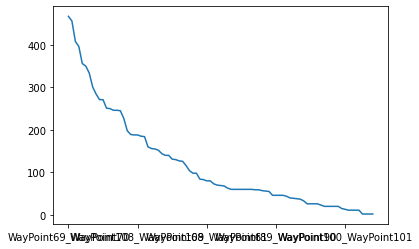

In [41]:
count.plot()

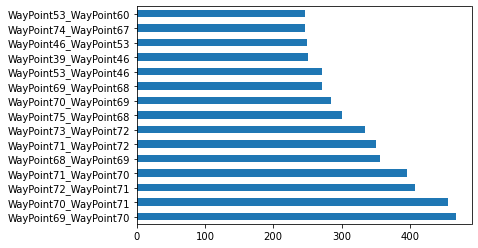

In [54]:
count[0:15].plot.barh()

# 3) save to csv file

In [58]:
count.to_csv('waypoint_pairs.csv')